In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем данные
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")


In [3]:
# Проводим первичный осмотр наших данных
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0           

In [4]:
# Проверяем общее количество пропусков
print(df.isnull().sum().sum())

36


In [5]:
# Удаляем ненужные столбцы 'Unnamed: 0' (индекс) и 'SPS'
df = df.drop(columns=['Unnamed: 0', 'SPS'])

# Далее удаляем признаки с единственным уникальным значением, тк они не несут информативности
cols_to_drop = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop.append(col)

if cols_to_drop:
    print(f"\nСтолбцы с одним уникальным значением: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)
else:
    print("\nСтолбцов с одним уникальным значением не обнаружено")


Столбцы с одним уникальным значением: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


In [6]:
 # Заполненяем пропущенные значения медианой
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Провереряем
print("\nКоличество пропусков:")
print(df.isnull().sum().sum())

print("\nИтоговое количество признаков:", len(df.columns))
print("Список оставшихся признаков:", list(df.columns))


Количество пропусков:
0

Итоговое количество признаков: 194
Список оставшихся признаков: ['IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', '

<ipython-input-7-1147714875>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['log_IC50'] = np.log10(df['IC50, mM'])
<ipython-input-7-1147714875>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['log_CC50'] = np.log10(df['CC50, mM'])
<ipython-input-7-1147714875>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

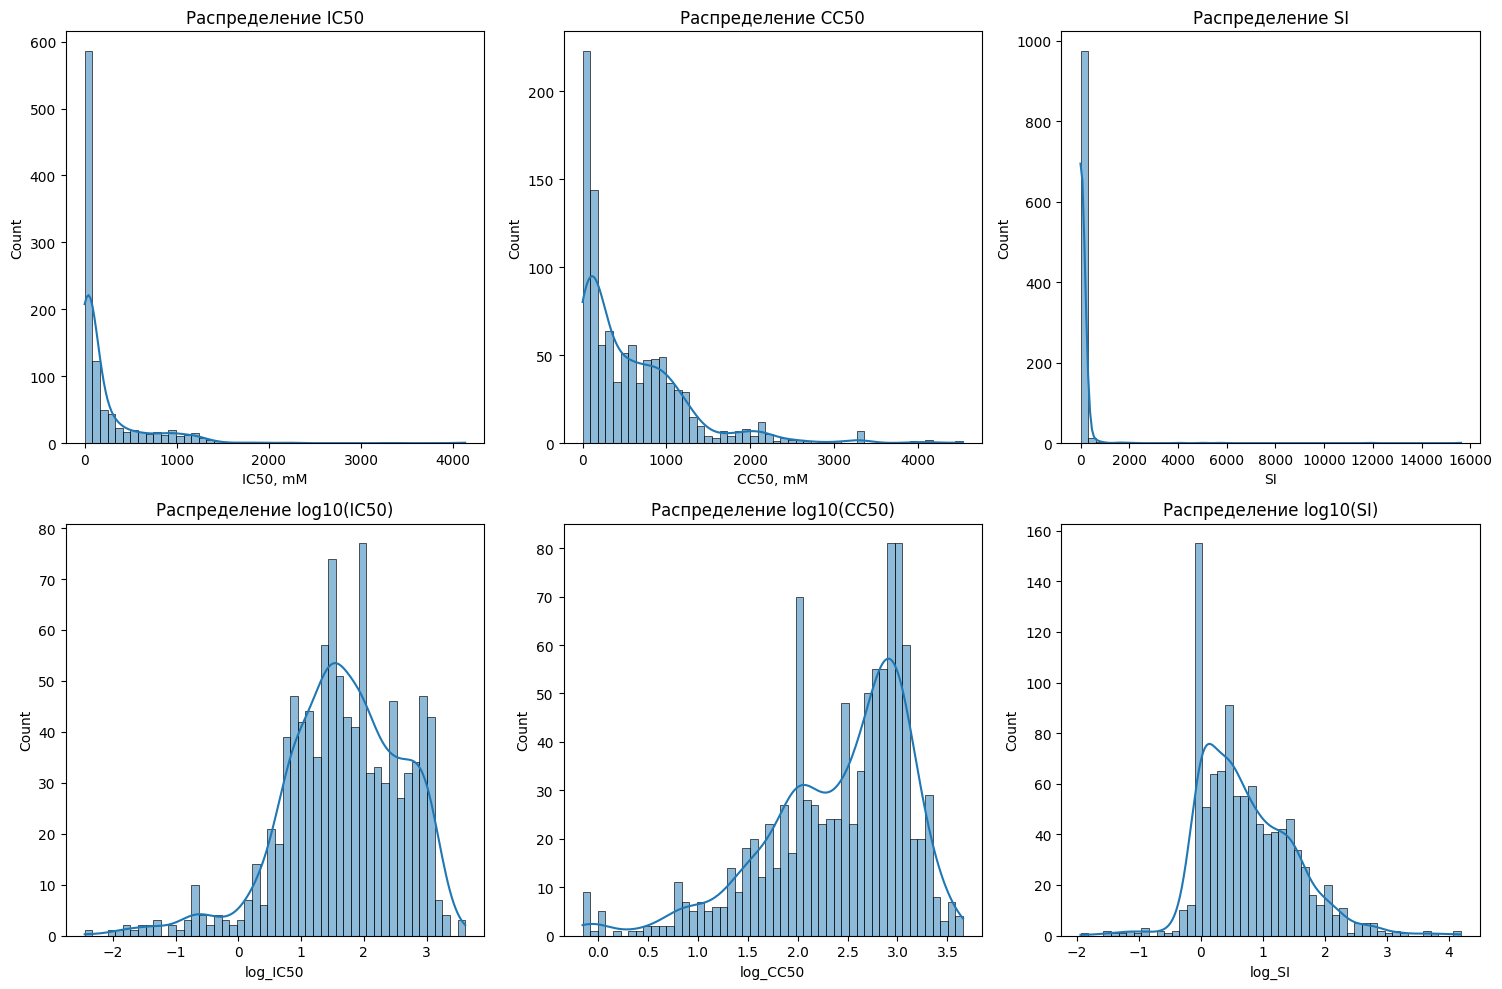


Пример данных после преобразований:
     IC50, mM  log_IC50    CC50, mM  log_CC50         SI    log_SI
0    6.239374  0.795141  175.482382  2.244234  28.125000  1.449093
1    0.771831 -0.112478    5.402819  0.732620   7.000000  0.845098
2  223.808778  2.349877  161.142320  2.207210   0.720000 -0.142668
3    1.705624  0.231883  107.855654  2.032843  63.235294  1.800960
4  107.131532  2.029917  139.270991  2.143861   1.300000  0.113943


In [7]:
# Логарифмируем целевые переменные для нормализации распределения

# Создаем новые колонки с логарифмированными значениями
df['log_IC50'] = np.log10(df['IC50, mM'])
df['log_CC50'] = np.log10(df['CC50, mM'])
df['log_SI'] = np.log10(df['SI'])

# Смотрим распределение до и после логарифмирования
plt.figure(figsize=(15, 10))

# До логарифмирования
plt.subplot(2, 3, 1)
sns.histplot(df['IC50, mM'], bins=50, kde=True)
plt.title('Распределение IC50')

plt.subplot(2, 3, 2)
sns.histplot(df['CC50, mM'], bins=50, kde=True)
plt.title('Распределение CC50')

plt.subplot(2, 3, 3)
sns.histplot(df['SI'], bins=50, kde=True)
plt.title('Распределение SI')

# После логарифмирования
plt.subplot(2, 3, 4)
sns.histplot(df['log_IC50'], bins=50, kde=True)
plt.title('Распределение log10(IC50)')

plt.subplot(2, 3, 5)
sns.histplot(df['log_CC50'], bins=50, kde=True)
plt.title('Распределение log10(CC50)')

plt.subplot(2, 3, 6)
sns.histplot(df['log_SI'], bins=50, kde=True)
plt.title('Распределение log10(SI)')

plt.tight_layout()
plt.show()

# Проверяем результаты
print("\nПример данных после преобразований:")
print(df[['IC50, mM', 'log_IC50', 'CC50, mM', 'log_CC50', 'SI', 'log_SI']].head())

Проведенный анализ выявил существенную неоднородность в распределении исследуемых показателей. Наблюдается выраженная концентрация данных в области малых значений при наличии протяженного "хвоста" в зоне высоких показателей.

После логарифмирования произошла нормализация формы распределения, оно стало более сбалансированным.

In [8]:
# Для улучшения качества моделей создадим дополнительные молекулярные дескрипторы на основе имеющихся данных:

def create_engineered_features(df):
    df = df.copy()

    # Основные преобразования
    df['Complexity_per_Mass'] = df['BertzCT'] / (df['MolWt'] + 1e-6)
    df['Ring_Atom_Ratio'] = df['RingCount'] / (df['HeavyAtomCount'] + 1)
    df['Polarity_Lipophilicity_Balance'] = df['TPSA'] / (abs(df['MolLogP']) + 5)

    return df

# Оптимизированное создание признаков
def optimized_feature_engineering(df):

    df = df.copy()

    # Основные соотношения
    df['Polarity_Balance'] = df['TPSA'] / (abs(df['MolLogP']) + 1)
    df['HBond_Count'] = df['NumHAcceptors'] + df['NumHDonors']

    # Топологические индексы
    df['Topo_Complexity'] = df['BertzCT'] * df['Kappa3']

    # Фармакокинетические параметры
    df['Lipinski_Score'] = (
        (df['MolWt'] < 500).astype(int) +
        (df['MolLogP'] < 5).astype(int) +
        (df['NumHDonors'] <= 5).astype(int) +
        (df['NumHAcceptors'] <= 10).astype(int)
    )

    # Электронные свойства
    df['Charge_Diff'] = df['MaxPartialCharge'] - df['MinPartialCharge']

    # Фрагментные особенности
    if 'fr_Ar_OH' in df.columns:
        df['Phenolic_Group'] = (df['fr_Ar_OH'] > 0).astype(int)

    if 'fr_halogen' in df.columns:
        df['Halogen_Ratio'] = df['fr_halogen'] / (df['HeavyAtomCount'] + 1)

    # Нормализация
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    return df

# Применим наши функции
# Сначала создаем базовые признаки
df_basic_features = create_engineered_features(df)

# Теперь добавляем оптимизированные признаки
df_final = optimized_feature_engineering(df_basic_features)

print("Новые созданные признаки:",
      [col for col in df_final.columns if col not in df.columns])

Новые созданные признаки: ['Complexity_per_Mass', 'Ring_Atom_Ratio', 'Polarity_Lipophilicity_Balance', 'Polarity_Balance', 'HBond_Count', 'Topo_Complexity', 'Lipinski_Score', 'Charge_Diff', 'Phenolic_Group', 'Halogen_Ratio']


In [9]:
  # Агрегируем группы взаимосвязанных дескрипторов через статистики

def aggregate_descriptor_groups(df):

    df = df.copy()

    # Словарь групп дескрипторов
    descriptor_groups = {
        'Chi': [col for col in df.columns if col.startswith('Chi')],
        'Kappa': [col for col in df.columns if col.startswith('Kappa')],
        'PEOE_VSA': [col for col in df.columns if col.startswith('PEOE_VSA')],
        'EState_VSA': [col for col in df.columns if col.startswith('EState_VSA')],
        'SMR_VSA': [col for col in df.columns if col.startswith('SMR_VSA')],
        'SlogP_VSA': [col for col in df.columns if col.startswith('SlogP_VSA')]
    }

    # Агрегация для каждой группы
    for group_name, cols in descriptor_groups.items():
        if len(cols) > 0:  # Проверка наличия столбцов
            # Базовые статистики
            df[f'{group_name}_mean'] = df[cols].mean(axis=1)
            df[f'{group_name}_max'] = df[cols].max(axis=1)
            df[f'{group_name}_sum'] = df[cols].sum(axis=1)
            df[f'{group_name}_std'] = df[cols].std(axis=1)

            # Специфические для групп
            if group_name in ['Chi', 'Kappa']:
                df[f'{group_name}_range'] = df[cols].max(axis=1) - df[cols].min(axis=1)

            if group_name.endswith('VSA'):
                df[f'{group_name}_nonzero'] = (df[cols] > 0).sum(axis=1)

    # Дополнительные кросс-групповые агрегации
    if 'PEOE_VSA_mean' in df.columns and 'EState_VSA_mean' in df.columns:
        df['VSA_charge_balance'] = df['PEOE_VSA_mean'] / (df['EState_VSA_mean'] + 1e-6)

    if 'SMR_VSA_mean' in df.columns and 'SlogP_VSA_mean' in df.columns:
        df['VSA_property_ratio'] = df['SMR_VSA_mean'] / (df['SlogP_VSA_mean'] + 1e-6)

    # Обработка возможных бесконечных значений
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    return df

# Применяем функции
df_aggregated = aggregate_descriptor_groups(df)

print(f"Было признаков: {len(df.columns)}")
print(f"Стало признаков: {len(df_aggregated.columns)}")
print("Новые агрегированные признаки:",
      [col for col in df_aggregated.columns if col not in df.columns])

Было признаков: 197
Стало признаков: 229
Новые агрегированные признаки: ['Chi_mean', 'Chi_max', 'Chi_sum', 'Chi_std', 'Chi_range', 'Kappa_mean', 'Kappa_max', 'Kappa_sum', 'Kappa_std', 'Kappa_range', 'PEOE_VSA_mean', 'PEOE_VSA_max', 'PEOE_VSA_sum', 'PEOE_VSA_std', 'PEOE_VSA_nonzero', 'EState_VSA_mean', 'EState_VSA_max', 'EState_VSA_sum', 'EState_VSA_std', 'EState_VSA_nonzero', 'SMR_VSA_mean', 'SMR_VSA_max', 'SMR_VSA_sum', 'SMR_VSA_std', 'SMR_VSA_nonzero', 'SlogP_VSA_mean', 'SlogP_VSA_max', 'SlogP_VSA_sum', 'SlogP_VSA_std', 'SlogP_VSA_nonzero', 'VSA_charge_balance', 'VSA_property_ratio']


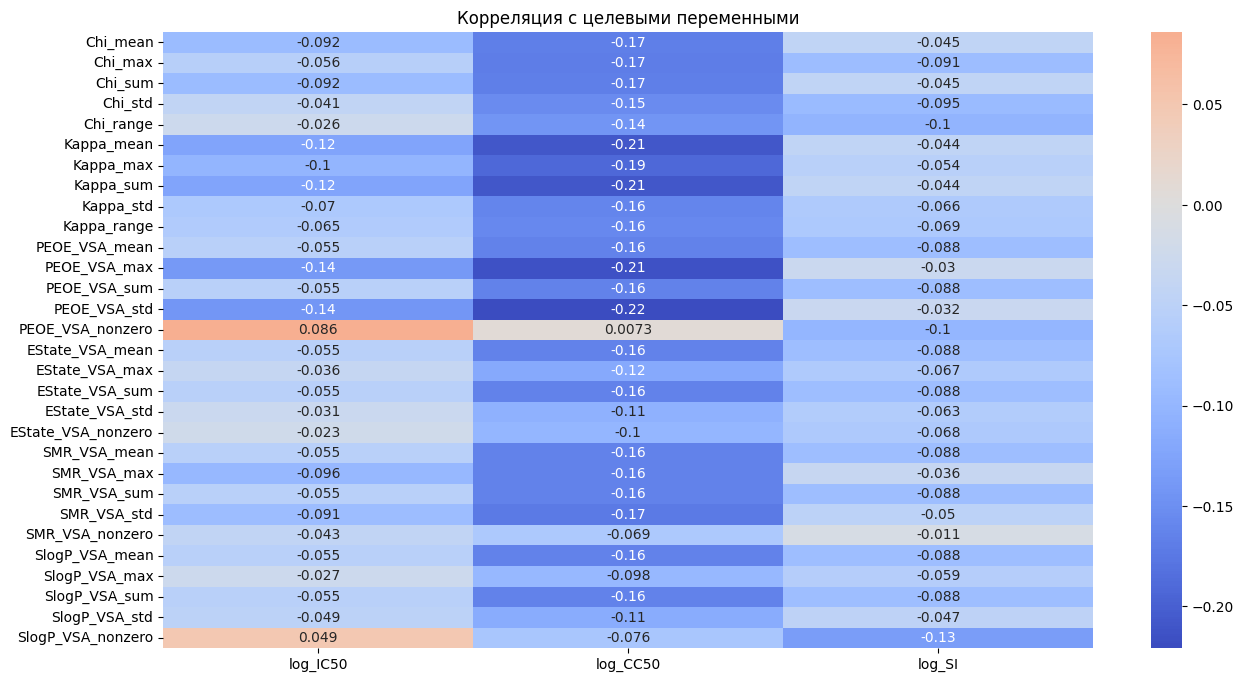

In [10]:
# Смотрим на корреляцию только агрегированных признаков
aggregated_features = [col for col in df_aggregated.columns
                      if any(x in col for x in ['_mean', '_max', '_sum', '_std', '_range', '_nonzero'])]

# Корреляция с целевыми переменными
targets = ['log_IC50', 'log_CC50', 'log_SI']
plt.figure(figsize=(15, 8))
sns.heatmap(df_aggregated[aggregated_features + targets].corr().loc[aggregated_features, targets],
            annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция с целевыми переменными')
plt.show()

In [11]:
# Значимые корреляции с целевыми переменными:
ic50_corr = df.corr()[['log_IC50']].sort_values('log_IC50', ascending=False)
print("Топ-10 признаков, коррелирующих с log_IC50:")
print(ic50_corr.head(10))

Топ-10 признаков, коррелирующих с log_IC50:
                          log_IC50
log_IC50                  1.000000
IC50, mM                  0.664432
log_CC50                  0.615896
CC50, mM                  0.455077
NumSaturatedHeterocycles  0.270582
NumAliphaticHeterocycles  0.234854
BCUT2D_MWLOW              0.184845
NumAromaticHeterocycles   0.182305
BCUT2D_CHGLO              0.156763
VSA_EState1               0.145519


In [12]:
# Корреляции с log_CC50
cc50_corr = df.corr()[['log_CC50']].sort_values('log_CC50', ascending=False)
print("Топ-10 признаков, коррелирующих с log_CC50:")
print(cc50_corr.head(10))

Топ-10 признаков, коррелирующих с log_CC50:
                          log_CC50
log_CC50                  1.000000
CC50, mM                  0.754014
log_IC50                  0.615896
IC50, mM                  0.429696
log_SI                    0.180876
BCUT2D_CHGLO              0.162240
NumSaturatedHeterocycles  0.158623
FpDensityMorgan2          0.152518
FpDensityMorgan1          0.147383
fr_Imine                  0.147148


In [13]:
# Корреляции с log_SI
si_corr = df.corr()[['log_SI']].sort_values('log_SI', ascending=False)
print("Топ-10 признаков, коррелирующих с log_SI:")
print(si_corr.head(10))

Топ-10 признаков, коррелирующих с log_SI:
                           log_SI
log_SI                   1.000000
SI                       0.355712
FractionCSP3             0.199422
fr_Imine                 0.195714
log_CC50                 0.180876
VSA_EState8              0.172714
HallKierAlpha            0.161079
CC50, mM                 0.148014
SlogP_VSA5               0.139615
NumSaturatedCarbocycles  0.137255


Наибольшее влияние оказывают непосредственно значения CC50, IC50, SI в то время как структурные особенности молекул (гетероциклы, имины, электростатика) имеют слабую, но статистически значимую связь.

In [14]:
# Сохраняем основной преобразованный DataFrame
df_aggregated.to_csv('aggregated_data1.csv', index=False)